In [23]:
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

## Reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [24]:
class State(TypedDict):
    messages:Annotated[list, add_messages]

In [25]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [26]:
from langchain_groq import ChatGroq

llm_groq=ChatGroq(model="qwen-qwq-32b")
llm_groq.invoke("Hey I am TJ and I like to do research!!!")

AIMessage(content="\n<think>\nOkay, the user is TJ, who mentions they like doing research. I should respond in a way that's friendly and encouraging. Let me start by greeting them and acknowledging their passion for research. Maybe ask what specific areas they're interested in to engage them further. I should keep it open-ended so they feel comfortable sharing more details. Also, I can mention some common research fields to give examples, but make sure to let them know I'm here to help with whatever they need. Need to keep the tone positive and supportive. Let me check the response structure: greeting, acknowledge their interest, ask about their focus areas, offer assistance, and keep it welcoming. Yeah, that should work. Alright, let's put that together.\n</think>\n\nHey TJ! That’s awesome that you love research! 💡 What specific areas or topics are you most passionate about? Whether it's science, history, tech, or something else entirely, I’d love to help you dive deeper or brainstorm

In [27]:
def chatbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}

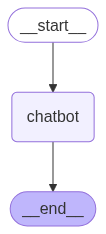

In [28]:
graph=StateGraph(State)

graph.add_node("chatbot", chatbot)

graph.add_edge(START, "chatbot")
graph.add_edge("chatbot", END)

graph_builder=graph.compile()

## Display
from IPython.display import Image, display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [29]:
graph_builder.invoke({"messages":"Hey I am TJ and I like to do research!!!"})

{'messages': [HumanMessage(content='Hey I am TJ and I like to do research!!!', additional_kwargs={}, response_metadata={}, id='9e7d1fcf-19a3-4a3f-b75a-541d8d807e43'),
  AIMessage(content='\n<think>\nOkay, so I need to figure out how to respond to someone named TJ who says they like to do research. The user is probably looking for some kind of engaging or encouraging reply. Let me start by thinking about what TJ might be expecting. Since they mentioned research, maybe they want to talk about their research interests or get some tips.\n\nFirst, I should acknowledge their interest in research to make them feel heard. Then, maybe ask about their specific areas of interest. But I should keep it open-ended so they can choose what to share. Also, since they used all caps in "Hey I am TJ and I like to do research!!!", they might be enthusiastic, so the response should match that energy.\n\nWait, the user is actually the assistant here, right? The original message is from TJ, and the assistant 

In [30]:
for event in graph_builder.stream({"messages":"Hey I am TJ and I like to do research!!!"}):
    print(event)

{'chatbot': {'messages': [AIMessage(content="\n<think>\nOkay, the user is TJ and they mentioned they like to do research. I should start by greeting them and acknowledging their interest in research. Maybe I can ask them about their specific research interests to get more details. I want to make sure I'm engaging and helpful, so asking open-ended questions would be good. Let me think of some examples of research areas people commonly get into. Maybe topics like climate change, AI, or space exploration? I should phrase it in a way that invites them to share more. Also, since they provided their name, maybe using it in the response could make it feel more personal. Let me put that together into a friendly and encouraging reply.\n</think>\n\nHey TJ! That's awesome that you enjoy research—it’s such a rewarding way to explore new ideas and contribute to our understanding of the world. What areas of research interest you most? Are you diving into topics like climate science, AI, space explor